# Deber ANN Brian Coyago

# Importaciones

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import SGD
from tensorflow import keras

# Lectura de archivos y variables

In [ ]:
dataframe = pd.read_csv('bmw_pricing_challenge.csv')

In [ ]:
dataframe

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,BMW,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,BMW,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,BMW,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01


# Análisis

In [ ]:
dataframe.describe()

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


# Encontrar nuevas características y usar LabelEncoder

In [ ]:
#Pasar Objecto a DateTime para la nueva característica
dataframe['registration_date'] = pd.to_datetime(dataframe['registration_date'], infer_datetime_format=True)
dataframe['sold_at'] = pd.to_datetime(dataframe['sold_at'], infer_datetime_format=True)


In [ ]:
#Crear nueva característica dias en función de la fecha de entrada y salida
dataframe['days_in_vent'] = dataframe['sold_at'] - dataframe['registration_date']
dataframe['days_in_vent'] = (dataframe['days_in_vent']).dt.days
dataframe

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,days_in_vent
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01,2161
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01,671
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01,2132
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01,1311
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01,1217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01,1035
4839,BMW,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01,1157
4840,BMW,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01,1066
4841,BMW,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01,883


In [ ]:
#Pasar variables tipo String a numéricas
lbEnconder = LabelEncoder()
dataframe["model_key"] = lbEnconder.fit_transform(dataframe['model_key'])
dataframe["fuel"] = lbEnconder.fit_transform(dataframe['fuel'])
dataframe["paint_color"] = lbEnconder.fit_transform(dataframe['paint_color'])
dataframe["car_type"] = lbEnconder.fit_transform(dataframe['car_type'])
dataframe["feature_1"] = lbEnconder.fit_transform(dataframe['feature_1'])
dataframe["feature_2"] = lbEnconder.fit_transform(dataframe['feature_2'])
dataframe["feature_3"] = lbEnconder.fit_transform(dataframe['feature_3'])
dataframe["feature_4"] = lbEnconder.fit_transform(dataframe['feature_4'])
dataframe["feature_5"] = lbEnconder.fit_transform(dataframe['feature_5'])
dataframe["feature_6"] = lbEnconder.fit_transform(dataframe['feature_6'])
dataframe["feature_7"] = lbEnconder.fit_transform(dataframe['feature_7'])
dataframe["feature_8"] = lbEnconder.fit_transform(dataframe['feature_8'])

In [ ]:
dataframe

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,days_in_vent
0,BMW,2,140411,100,2012-02-01,0,1,0,1,1,0,0,1,1,1,0,11300,2018-01-01,2161
1,BMW,61,13929,317,2016-04-01,3,5,0,1,1,0,0,0,1,1,1,69700,2018-02-01,671
2,BMW,21,183297,120,2012-04-01,0,9,0,0,0,0,0,1,0,1,0,10200,2018-02-01,2132
3,BMW,31,128035,135,2014-07-01,0,7,0,1,1,0,0,1,1,1,1,25100,2018-02-01,1311
4,BMW,33,97097,160,2014-12-01,0,8,0,1,1,0,0,0,1,1,1,33400,2018-04-01,1217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,13,39743,110,2015-10-01,0,1,7,0,1,0,0,0,0,1,0,14600,2018-08-01,1035
4839,BMW,12,49832,100,2015-06-01,0,5,7,0,1,0,0,0,0,1,1,17500,2018-08-01,1157
4840,BMW,13,19633,110,2015-10-01,0,5,7,0,1,0,0,0,0,1,1,17000,2018-09-01,1066
4841,BMW,12,27920,110,2016-04-01,0,3,7,1,1,0,0,0,0,1,1,22700,2018-09-01,883


# Pearson

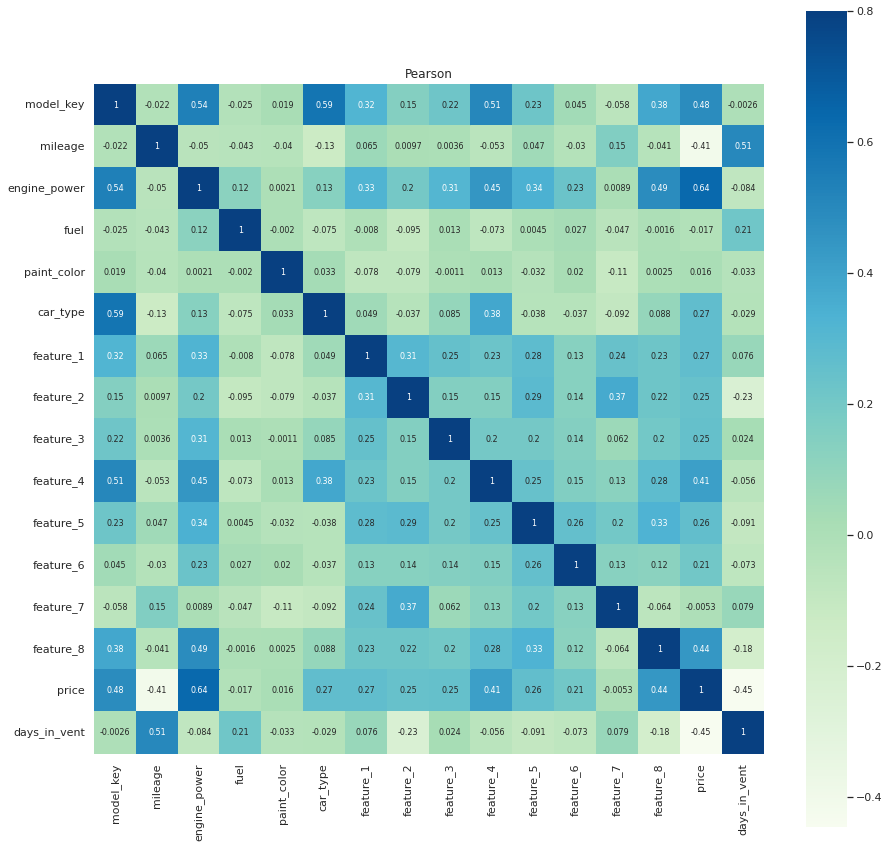

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(dataframe.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':8})

# Limpieza

In [ ]:
#Variables a quitar sin análisis: maker_key,
dataframe = dataframe.drop('maker_key',axis=1)
dataframe = dataframe.drop('registration_date',axis=1)
dataframe = dataframe.drop('sold_at',axis=1)

#Variables a quitar con el análisis de Pearson: fuel, paint_color, feature_7
dataframe = dataframe.drop('fuel',axis=1)
dataframe = dataframe.drop('paint_color',axis=1)
dataframe = dataframe.drop('feature_7',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08d2a15810>,
      dtype=object)

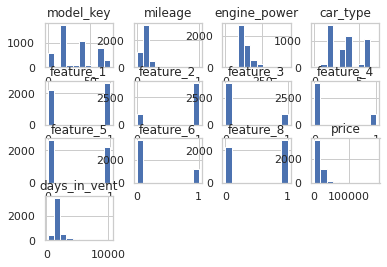

In [ ]:
dataframe.hist()

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   model_key     4843 non-null   int64
 1   mileage       4843 non-null   int64
 2   engine_power  4843 non-null   int64
 3   car_type      4843 non-null   int64
 4   feature_1     4843 non-null   int64
 5   feature_2     4843 non-null   int64
 6   feature_3     4843 non-null   int64
 7   feature_4     4843 non-null   int64
 8   feature_5     4843 non-null   int64
 9   feature_6     4843 non-null   int64
 10  feature_8     4843 non-null   int64
 11  price         4843 non-null   int64
 12  days_in_vent  4843 non-null   int64
dtypes: int64(13)
memory usage: 492.0 KB


In [ ]:
dataframe

,model_key,mileage,engine_power,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_8,price,days_in_vent
0,2,140411,100,0,1,1,0,0,1,1,0,11300,2161
1,61,13929,317,0,1,1,0,0,0,1,1,69700,671
2,21,183297,120,0,0,0,0,0,1,0,0,10200,2132
3,31,128035,135,0,1,1,0,0,1,1,1,25100,1311
4,33,97097,160,0,1,1,0,0,0,1,1,33400,1217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,13,39743,110,7,0,1,0,0,0,0,0,14600,1035
4839,12,49832,100,7,0,1,0,0,0,0,1,17500,1157
4840,13,19633,110,7,0,1,0,0,0,0,1,17000,1066
4841,12,27920,110,7,1,1,0,0,0,0,1,22700,883


In [ ]:
#Revisión de nullos
dataframe.isnull().sum()

model_key       0
mileage         0
engine_power    0
car_type        0
feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
feature_6       0
feature_8       0
price           0
days_in_vent    0
dtype: int64

In [ ]:
#Separar caracteristicas X y Y
x = dataframe.drop('price',axis=1)
y = dataframe['price']

In [ ]:
#Caracteristicas x
x

,model_key,mileage,engine_power,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_8,days_in_vent
0,2,140411,100,0,1,1,0,0,1,1,0,2161
1,61,13929,317,0,1,1,0,0,0,1,1,671
2,21,183297,120,0,0,0,0,0,1,0,0,2132
3,31,128035,135,0,1,1,0,0,1,1,1,1311
4,33,97097,160,0,1,1,0,0,0,1,1,1217
...,...,...,...,...,...,...,...,...,...,...,...,...
4838,13,39743,110,7,0,1,0,0,0,0,0,1035
4839,12,49832,100,7,0,1,0,0,0,0,1,1157
4840,13,19633,110,7,0,1,0,0,0,0,1,1066
4841,12,27920,110,7,1,1,0,0,0,0,1,883


In [ ]:
#Salida y
y

0       11300
1       69700
2       10200
3       25100
4       33400
        ...  
4838    14600
4839    17500
4840    17000
4841    22700
4842    15500
Name: price, Length: 4843, dtype: int64

In [ ]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(x)
x = minmaxscaler.transform(x)

In [ ]:
x

array([[0.02702703, 0.14041322, 0.23640662, ..., 1.        , 0.        ,
        0.1937668 ],
       [0.82432432, 0.01398685, 0.74940898, ..., 1.        , 1.        ,
        0.04540476],
       [0.28378378, 0.18328036, 0.28368794, ..., 0.        , 0.        ,
        0.19087922],
       ...,
       [0.17567568, 0.01968834, 0.26004728, ..., 0.        , 1.        ,
        0.08473564],
       [0.16216216, 0.02797169, 0.26004728, ..., 0.        , 1.        ,
        0.06651399],
       [0.56756757, 0.19581784, 0.37825059, ..., 0.        , 1.        ,
        0.18460619]])

#Entrenamiento y Testeo

In [ ]:
#X #Y
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=50, test_size=0.30)

In [ ]:
ann = Sequential()
ann.add(Dense(11,activation='relu'))
ann.add(Dense(5,activation='relu'))
#ann.add(Dense(3,activation='relu'))
ann.add(Dense(1))
#sgd = SGD(lr = 0.02, momentum=0.7)
ann.compile(optimizer='adam',loss='mse') 
#Categorical_crossentropy
#rmsprop adam sgd
#categorical_crossentropy binary_crossentropy metrics='accuracy'

In [ ]:
ann.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),batch_size=20,epochs=350, verbose=1)

Epoch 1/350
170/170 [==============================] - 2s 6ms/step - loss: 342061216.0000 - val_loss: 320075168.0000
Epoch 2/350
170/170 [==============================] - 1s 7ms/step - loss: 341791584.0000 - val_loss: 319580640.0000
Epoch 3/350
170/170 [==============================] - 1s 8ms/step - loss: 340927200.0000 - val_loss: 318361056.0000
Epoch 4/350
170/170 [==============================] - 1s 6ms/step - loss: 339231936.0000 - val_loss: 316238464.0000
Epoch 5/350
170/170 [==============================] - 1s 8ms/step - loss: 336494688.0000 - val_loss: 313011552.0000
Epoch 6/350
170/170 [==============================] - 1s 7ms/step - loss: 332534816.0000 - val_loss: 308533120.0000
Epoch 7/350
170/170 [==============================] - 1s 6ms/step - loss: 327268800.0000 - val_loss: 302773984.0000
Epoch 8/350
170/170 [==============================] - 1s 7ms/step - loss: 320637312.0000 - val_loss: 295643808.0000
Epoch 9/350
170/170 [==============================] - 1s 8ms/st

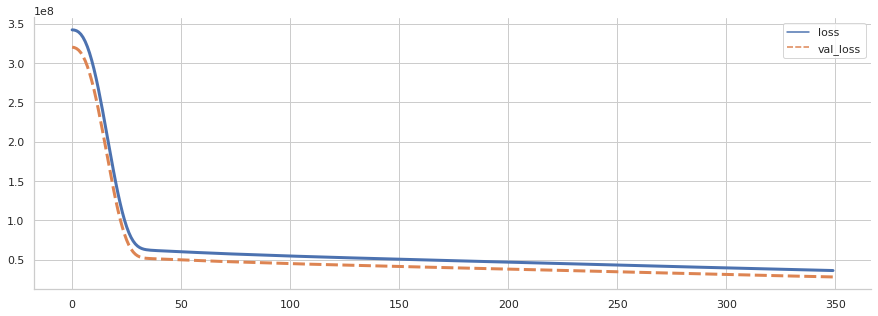

In [ ]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss, lw=3)
sns.despine()

In [ ]:
y_pred = ann.predict(x_test)
print(mean_absolute_error(y_test, y_pred))

3405.6643971537032


In [ ]:
auto0 = dataframe.drop('price',axis=1).iloc[0]
print(auto0, 'Precio:',dataframe.iloc[0]['price'])
#print(ann.predict(casa0))

model_key            2
mileage         140411
engine_power       100
car_type             0
feature_1            1
feature_2            1
feature_3            0
feature_4            0
feature_5            1
feature_6            1
feature_8            0
days_in_vent      2161
Name: 0, dtype: int64 Precio: 11300


In [ ]:
auto0 = minmaxscaler.transform(auto0.values.reshape(-1,12))
print(ann.predict(auto0))

[[8246.068]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
